In [1]:
import xarray as xr
import scipy.signal as sig
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

# Preamble

This lab uses the daily geopotenial height data from the NCEP reanalysis from the year 2000. The file path is given in the filtering example.

# Questions 

## 1 - Filtering and Standard Deviations of the 500 hPa heights 

1.1 - following the filtering exmaple shown below, create highpass and lowpass filtered datasets, with a filtering frequency of 6 days (approximately the lifetime of a baroclinic eddy in the atmosphere).  

1.2 plot the standard deviation of the original dataset, the highpass filtered data, and the low pass filtered data. Why is the total signal have a higher standard deviation than either the high pass or low pass filtered data? What signal exists in the low pass filtered data which does not exist in the high pass filtered data?

hint:  sig.sosfiltfilt takes an axis arguement that you can use to filter all of the data at once, this will make things a lot faster

## 2 - Point Correlations 

2.1 - calculate the point correlations for the high pass and low pass filtered data for the point (45N, 180E). As a very rough signifigance test, mask out any data that has $|r|<0.1$ What explains the large difference? 

2.2 calculate the point correlations for the high pass data for the points (45N, 180E) and (0N, 180E). What can you say about the lengths of the correlation in the tropics vs the midlatitudes? 

2.3 calculate the point correlations for the high pass data for the points (45N, 180E), (45N, 240E), (45N, 300E), (45S, 180E), (45S, 240E), (45S, 300E). What is the main difference between the point correlations in the northern and southern hemispheres? What explains this difference?

hint: I would strongly reccomend creating your own function for these calculations, since they will become very repetitive.

hint 2: For claculating the point correlations you can either reshape the data into a vector and then back to a matrix, or use np.newaxis to broadcast an axis. e.g. if x is 1D and y is 2D you can find the element-wise product z by taking 

```z = x[:,np,newaxis] * y ```

This is much faster than trying to loop over things.

hint 3:

you can make a filled contour plot with 

```
plt.contourf(x,y,c,
levels=levels,
extend='both',
cmap=plt.cm.coolwarm)
```

where levels is a variable containing the levels of the data that you want to plot. If you make the levels below the maximum, the extend='both' will fill in the maximum data the highest value it can (e.g. if the maximum level is 0.5, and it gets a value of 1, it will plot the data at this point with a value of 1).

Also contourf or pcolor will plot data as white if it sees a nan. This means that you can do something like 

```corr[np.abs(corr)<threshold]=np.nan```

to remove all correlations below a certain value from a plot. 

You can then reset the levels to emphasize lower correlation values, while still masking the data that you wnat to ignore.



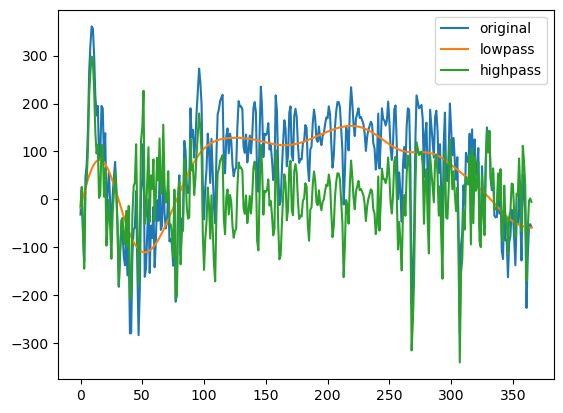

In [12]:
# filtering example
# here we are going to compute the high pass and low pass filtered 
# 1000 hPa geopotential heights at a point in the North Pacific.
# the filter parameters are:
# order=4 (fine to leave this as is)
# frequency=1/30 (controls which frequencies are filtered out)
# output='sos' outputs data into a "second ordered sequenced" version for sosfilt
# bytpe='low' controls whether the filter coeffecients are for high or low pass

indir = '../../data'
dsh = xr.open_dataset(f'{indir}/hgt.2000.nc')
h_point = dsh.hgt.data[:,0,18,72]

sos_low = sig.butter(4, 1/30, output='sos', btype='low')
h_point_l = sig.sosfiltfilt(sos_low, h_point, axis=0)

sos_high = sig.butter(4, 1/30, output='sos', btype='high')
h_point_h = sig.sosfiltfilt(sos_high, h_point, axis=0)


plt.plot(h_point,label='original')
plt.plot(h_point_l,label='lowpass')
plt.plot(h_point_h,label='highpass')

plt.legend()

